In [24]:
import numpy as np
import pandas as pd 

In [25]:
import os
for dirname, _, filenames in os.walk('./datas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./datas/database.sqlite
./datas/iris.csv


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

import warnings
warnings.filterwarnings('ignore')

## Lecture Donnee

In [27]:
df = pd.read_csv('./datas/iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Affichage Donnee

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
df = df.sample(frac=1)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
8,9,4.4,2.9,1.4,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor


## Preparation Donnee

In [31]:
x = df[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
x.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,77,6.8,2.8,4.8,1.4
100,101,6.3,3.3,6.0,2.5
8,9,4.4,2.9,1.4,0.2
130,131,7.4,2.8,6.1,1.9
2,3,4.7,3.2,1.3,0.2
34,35,4.9,3.1,1.5,0.1
48,49,5.3,3.7,1.5,0.2
109,110,7.2,3.6,6.1,2.5
132,133,6.4,2.8,5.6,2.2
78,79,6.0,2.9,4.5,1.5


In [32]:
y = df[["Species"]]
y.head(10)

,Species
76,Iris-versicolor
100,Iris-virginica
8,Iris-setosa
130,Iris-virginica
2,Iris-setosa
34,Iris-setosa
48,Iris-setosa
109,Iris-virginica
132,Iris-virginica
78,Iris-versicolor


### Entrainement Modele

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaler_X = StandardScaler() # Initialisation d’un standardiseur pour la variable explicative X
#scaler_y = StandardScaler() # Initialisation d’un standardiseur pour la variable cible y

# Apprentissage des paramètres (moyenne, écart-type) sur X_train et transformation des données
#X_train_scaled = scaler_X.fit_transform(X_train)

# Apprentissage des paramètres sur y_train et transformation des données
#y_train_scaled = scaler_y.fit_transform(y_train)

# Transformation de X_test à l’aide des paramètres appris sur X_train (pas de fit ici)
#X_test_scaled = scaler_X.transform(X_test)

# Transformation de y_test à l’aide des paramètres appris sur y_train (pas de fit ici non plus)
#y_test_scaled = scaler_y.transform(y_test)

### Fonction

In [34]:
import joblib

In [35]:
def save_model(model, scal_x, scal_y, filename: str):
    """
    Enregistre le modèle dans un fichier.
    
    Paramètres :
    - model : le modèle à enregistrer
    - filename : nom du fichier dans lequel enregistrer le modèle
    """
    filename = filename.lower()
    
    model_dir = "../models/"
    
    # Créer le répertoire models s'il n'existe pas
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Créer le répertoire du modèle s'il n'existe pas
    model_path = os.path.join(model_dir, filename)
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    # Sauvegarder le modèle et les scalers
    joblib.dump(model, f"{model_path}/{filename}.pkl")
    joblib.dump(scal_x, f"{model_path}/{filename}_scaler_X.pkl")
    joblib.dump(scal_y, f"{model_path}/{filename}_scaler_y.pkl")
    print(f"Modèle enregistré dans {model_path}")

### Use DecisionTreeClassifier

In [36]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict([[128,6.1,3.0,4.9,1.8]])
print(y_pred)

['Iris-virginica']


[Text(0.4, 0.8333333333333334, 'x[4] <= 0.8\ngini = 0.661\nsamples = 120\nvalue = [47, 35, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 100.5\ngini = 0.499\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

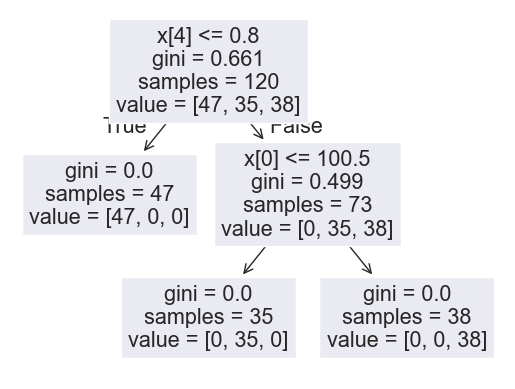

In [37]:
tree.plot_tree(clf)


### DecisionTreeClassifier Test

In [38]:
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### DecisionTreeClassifier Save

In [40]:
save_model(clf, X_train, y_train, "decision_tree_classifier")

Modèle enregistré dans ../models/decision_tree_classifier


### Use RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train.values.ravel())

# Prédiction sur un exemple
y_pred_rf = rf_clf.predict([[128,6.1,3.0,4.9,1.8]])
print(f"Prédiction RandomForest: {y_pred_rf}")

Prédiction RandomForest: ['Iris-virginica']


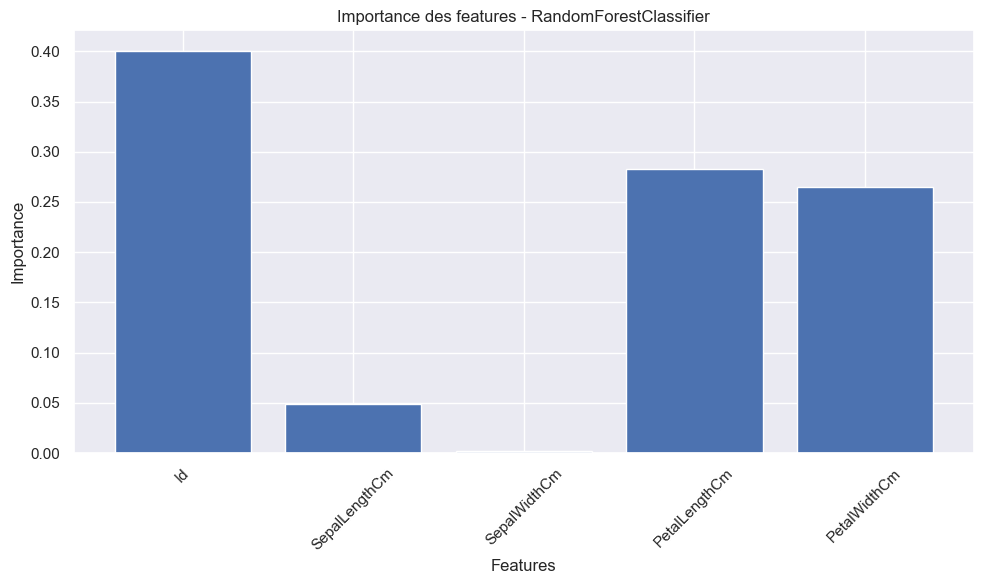

In [42]:
# Affichage de l'importance des features
importances = rf_clf.feature_importances_
feature_names = X_train.columns

# Visualisation de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title('Importance des features - RandomForestClassifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Use RandomForestClassifier Test

Rapport de classification - RandomForestClassifier:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<Figure size 800x600 with 0 Axes>

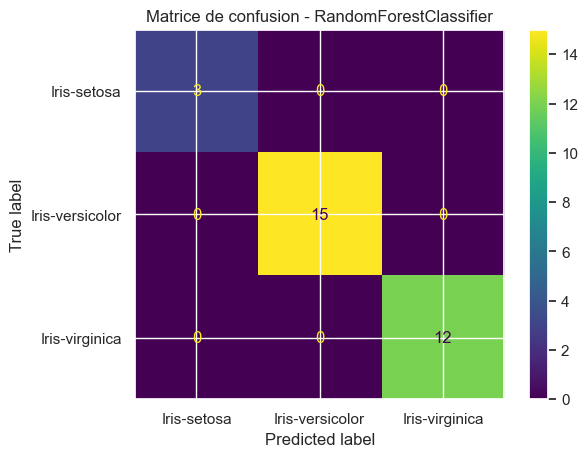

In [43]:
# Test du RandomForestClassifier sur les données de test
y_pred_rf_test = rf_clf.predict(X_test)

# Affichage du rapport de classification
print("Rapport de classification - RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf_test))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.title('Matrice de confusion - RandomForestClassifier')
plt.show()

### RandomForestClassifier Save

In [44]:
# Sauvegarder le modèle RandomForestClassifier
save_model(rf_clf, X_train, y_train, "random_forest_classifier")

Modèle enregistré dans ../models/random_forest_classifier


In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [46]:
# Test de la fonction save_model corrigée
def save_model(model, scal_x, scal_y, filename: str):
    """
    Enregistre le modèle dans un fichier.
    
    Paramètres :
    - model : le modèle à enregistrer
    - filename : nom du fichier dans lequel enregistrer le modèle
    """
    filename = filename.lower()
    
    model_dir = "../models/"
    
    # Créer le répertoire models s'il n'existe pas
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Créer le répertoire du modèle s'il n'existe pas
    model_path = os.path.join(model_dir, filename)
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    # Sauvegarder le modèle et les scalers
    joblib.dump(model, f"{model_path}/{filename}.pkl")
    joblib.dump(scal_x, f"{model_path}/{filename}_scaler_X.pkl")
    joblib.dump(scal_y, f"{model_path}/{filename}_scaler_y.pkl")
    print(f"Modèle enregistré dans {model_path}")

# Test de la fonction avec un modèle simple
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('./datas/iris.csv')
x = df[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df[["Species"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test de sauvegarde
save_model(clf, X_train, y_train, "test_model")
print("Test de la fonction save_model réussi")

Modèle enregistré dans ../models/test_model
Test de la fonction save_model réussi
